# Процесс Орнштейна-Уленбека

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sde
import threading as thr
%matplotlib inline

In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = (13.0, 6.0)
rcParams['font.size'] = 18

Уравнение *процесса Орнштейна-Уленбека* имеет следующий вид
\begin{equation}
    \mathrm{d}x(t) = \beta(x(t)-\alpha)\mathrm{d}t + \sigma \mathrm{d}W(t),\;\; x(0) = x_{0}.
\end{equation}
и точное решение
\begin{equation}
    x(t) = \alpha + (x_0-\alpha)\exp(-\beta t) + \dfrac{\sigma}{\sqrt{2\beta}}\sqrt{1-\exp(-2\beta t)}\mathrm{d} W
\end{equation}
Параметры для численного эксперемента выберем следующие: $\mu = 2,\; \sigma = 1$, а начальное значени $ x_{0} = 1$.

In [3]:
def f(x):
    """Вектор сноса"""
    β = 0.1
    α = 1.0
    return β*(x-α)

def g(x):
    """Диффузия"""
    σ = 0.5
    return σ


def exact_solution(x_0, t, W):
    """Точное решение СДУ"""
    α = 1.0
    β = 0.1
    σ = 0.5
    return α + (x_0 - α)*np.exp(-β*t) + σ*np.sqrt(1.0-np.exp(-2.0*β*t))*W

Генерируем траекторию процесса Винера из `N` шагов:

In [4]:
T = 1.0
N = 10**3
x_0 = 1

In [5]:
(dt, t, dW, W) = sde.wiener_process(N)

In [6]:
x = exact_solution(x_0, t, W)

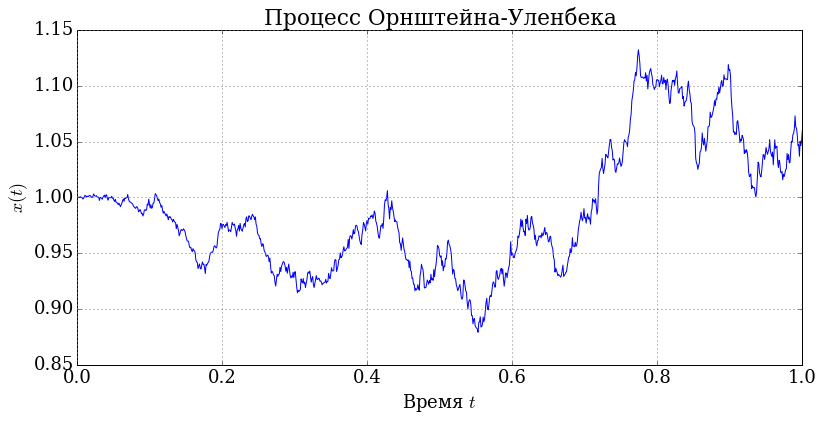

In [7]:
fig0 = plt.figure(0)
ax0 = fig0.add_subplot(1,1,1)
ax0.set_title("Процесс Орнштейна-Уленбека")
ax0.set_xlabel("Время $t$")
ax0.set_ylabel("$x(t)$")
ax0.plot(t,x)

## Эмпирические дисперсия и математическое ожидание

In [27]:
# число проводимых эксперементов
sim_nums = np.arange(0,500,1)

array_of_xs = np.empty((N,len(sim_nums)))

def simulation(sim_nums):
    for sim_num in sim_nums:
        (dt, t, dW, W) = sde.wiener_process(N)

        x = exact_solution(x_0, t, W)
        array_of_xs[:, sim_num] = x


In [28]:
# Распределяем работу между нитями
ths = [] # Нити
for part in np.split(sim_nums, 5):
    ths.append(thr.Thread(target=simulation, args=(part,)))

for th in ths:
    th.start()
for th in ths:
    th.join()

In [54]:
Ex = array_of_xs.mean(axis=-1)
Median  = np.median(array_of_xs, axis=-1)
Q1, Q3, Q95, Q5, Q100, Q0 = np.percentile(array_of_xs, (25, 75, 95, 5, 100, 0), axis=-1)
Dx = np.mean(array_of_xs**2, axis=-1)

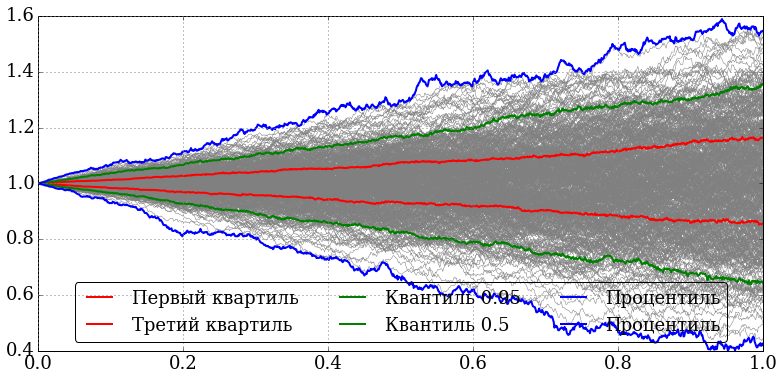

In [56]:
fig1 = plt.figure(1)
ax1 = fig1.add_subplot(1,1,1)

for sim_num in sim_nums:
    ax1.plot(t, array_of_xs[:, sim_num], color='gray', lw=0.5)
    
ax1.plot(t, Q1, color='r', label='Первый квартиль', lw = 2.0)
ax1.plot(t, Q3, color='r', label='Третий квартиль', lw = 2.0)
ax1.plot(t, Q95, color='g', label='Квантиль 0.95', lw = 2.0)
ax1.plot(t, Q5, color='g', label='Квантиль 0.5', lw = 2.0)
ax1.plot(t, Q100, color='b', label='Процентиль', lw = 2.0)
ax1.plot(t, Q0, color='b', label='Процентиль', lw = 2.0)
ax1.legend(ncol=3, loc='lower center', framealpha=None)
    

In [57]:
fig1.savefig("Картинка.png", dpi=300)